# Diurnal cycle (as monthly means) datasets in MERRA2 

#### Search the string "diurnal" on these pages, click info, and grab the URL at the top of the .info page

##### Hourly 2D fields: https://goldsmr4.gesdisc.eosdis.nasa.gov/dods/
##### 3hourly 3D fields: https://goldsmr5.gesdisc.eosdis.nasa.gov/dods/

In [1]:
# xarray install may have some options, I recommend checking it and installing with its dependencies

import xarray as xr
import matplotlib.pyplot as plt

In [6]:
# 2D state variables, available hourly, ens has 24 values

ds = xr.open_dataset('https://goldsmr4.gesdisc.eosdis.nasa.gov/dods/M2IUNXASM')

In [7]:
ds

<xarray.Dataset>
Dimensions:  (ens: 24, time: 514, lat: 361, lon: 576)
Coordinates:
  * ens      (ens) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 20.0 21.0 22.0 23.0 24.0
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2022-10-01
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
Data variables: (12/24)
    disph    (ens, time, lat, lon) float32 ...
    ps       (ens, time, lat, lon) float32 ...
    qv10m    (ens, time, lat, lon) float32 ...
    qv2m     (ens, time, lat, lon) float32 ...
    slp      (ens, time, lat, lon) float32 ...
    t10m     (ens, time, lat, lon) float32 ...
    ...       ...
    u10m     (ens, time, lat, lon) float32 ...
    u2m      (ens, time, lat, lon) float32 ...
    u50m     (ens, time, lat, lon) float32 ...
    v10m     (ens, time, lat, lon) float32 ...
    v2m      (ens, time, lat, lon) float32 ...
    v50m     (ens, time, lat, lon) float32 ...
Attributes:
    title:        MERRA-2 instU_2d_asm_Nx: 2d,Diurnal, Instantaneous,Single-L...
    Conventions:  COARDS\nGrADS
    dataType:     Grid
    history:      Wed Nov 23 09:50:00 GMT 2022 : imported by GrADS Data Serve...

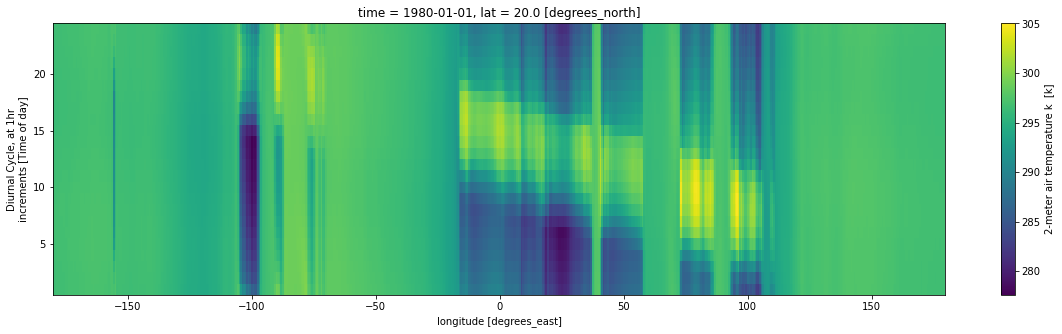

In [8]:
# First month, Jan 1980, on the equator 
plt.figure(figsize=(20, 5)) 

ds.t2m[:,0,220,:].plot() # eastern Africa is hottest at about 15 UTC


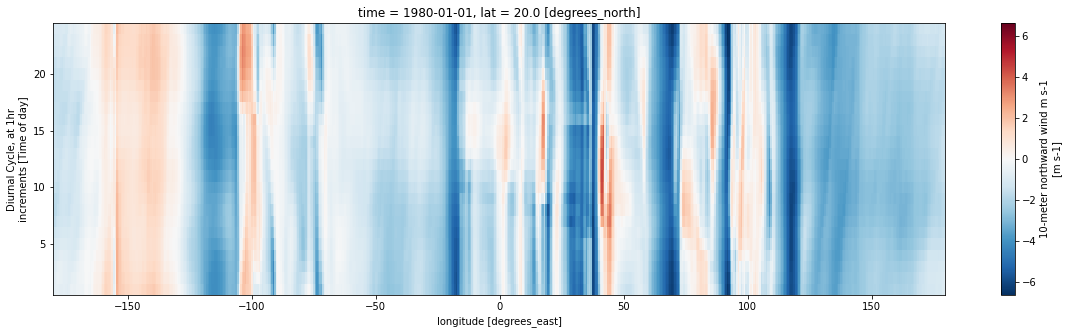

In [9]:
# First month, Jan 1980, on the equator 
plt.figure(figsize=(20, 5)) 

ds.v10m[:,0,220,:].plot() # Meridional wind 


In [11]:
# Radiative tendencies, the initial driver of it all 

dsrad = xr.open_dataset('https://goldsmr5.gesdisc.eosdis.nasa.gov/dods/M2TUNPRAD')
dsrad

<xarray.Dataset>
Dimensions:     (ens: 8, time: 513, lev: 42, lat: 361, lon: 576)
Coordinates:
  * ens         (ens) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0
  * time        (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2022-09-01
  * lev         (lev) float64 1e+03 975.0 950.0 925.0 900.0 ... 0.5 0.4 0.3 0.1
  * lat         (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon         (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
Data variables:
    cloud       (ens, time, lev, lat, lon) float32 ...
    dtdtlwr     (ens, time, lev, lat, lon) float32 ...
    dtdtlwrclr  (ens, time, lev, lat, lon) float32 ...
    dtdtswr     (ens, time, lev, lat, lon) float32 ...
    dtdtswrclr  (ens, time, lev, lat, lon) float32 ...
Attributes:
    title:        MERRA-2 tavgU_3d_rad_Np: 3d,Diurnal,Time-Averaged,Pressure-...
    Conventions:  COARDS\nGrADS
    dataType:     Grid
    history:      Tue Oct 25 09:45:48 GMT 2022 : imported by GrADS Data Serve...

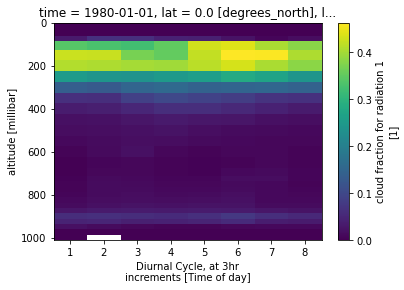

In [38]:
dsrad.cloud[:,0,:,180,0].transpose().plot(yincrease=False)

#.plot() # equatorial dateline

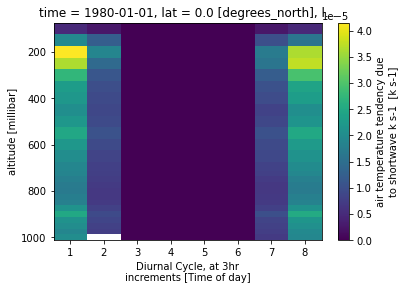

In [40]:
# solar radiative heating, oh the ozone dominates better clip it 
# https://docs.xarray.dev/en/stable/user-guide/plotting.html shows yincrease=False trick 

dsrad.dtdtswr[:,0,0:25,180,0].transpose().plot(yincrease=False)